# 0. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 1. 결측치 개수 확인 & 처리

In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df.isnull().sum())

데이터 세트 Null 값의 개수 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값의 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값의 개수  177


In [ ]:
titanic_df.dropna(axis=0, inplace=True)

In [ ]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      453
female    261
Name: Sex, dtype: int64


 Cabin 값 분포 :
 N              529
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C110             1
C90              1
F G63            1
C101             1
E49              1
Name: Cabin, Length: 135, dtype: int64


 Embarked 값 분포 :
 S    554
C    130
Q     28
N      2
Name: Embarked, dtype: int64


# 2. 데이터 확인하기
### 2.1 선실 등급에 따라 부자와 가난한 사람에 대한 판별을 하기 위해 선실 등급(Cabin 맨 앞자리)만 추출한다. 

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

### 2.2 성별에 따른 생존여부 분석

In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            64
        1           197
male    0           360
        1            93
Name: Survived, dtype: int64

여성 생존자수가 남성 생존자수보다 현저히 많은 것을 알 수 있다.

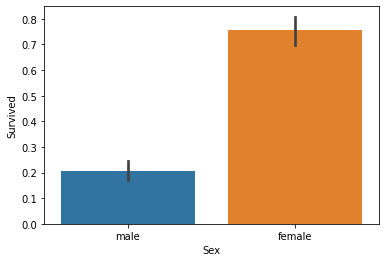

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

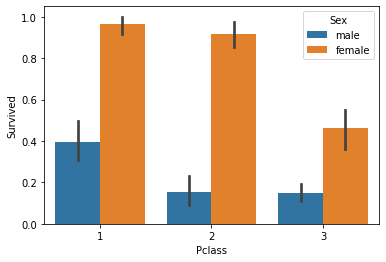

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

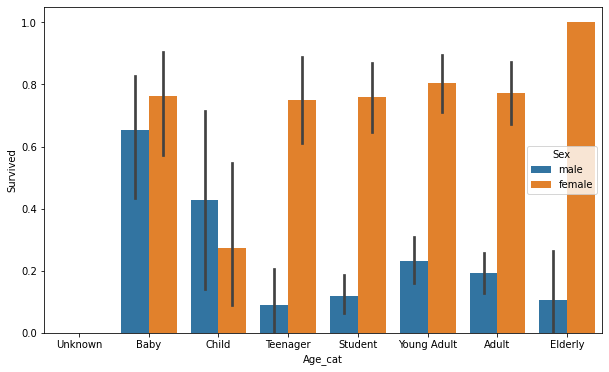

In [ ]:
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
# titanic_df.drop('Age_cat', axis=1, inplace=True)

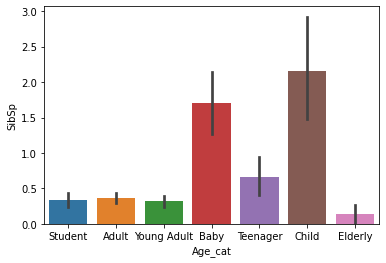

In [ ]:
sns.barplot(x='Age_cat', y='SibSp', data=titanic_df)

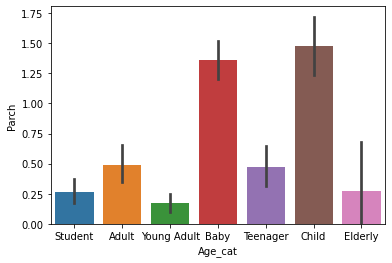

In [ ]:
sns.barplot(x='Age_cat', y='Parch', data=titanic_df)

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,4,3,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,7,3,Baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,7,3,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,7,0,Teenager
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,6,3,Baby


In [ ]:
titanic_df.groupby(titanic_df['Pclass'] == 1)['Fare'].mean()[1]

87.96158225806447

In [ ]:
fill_mean_func = lambda g: g['Age'].fillna(g.mean(), inplace=True)
titanic_df.groupby('Parch').apply(fill_mean_func)

""


In [ ]:
titanic_df.groupby('Age_cat').mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Age_cat,,,,,,,,,,
Adult,461.210256,0.400000,1.835897,0.641026,44.830769,0.369231,0.487179,44.259658,5.010256,2.333333
Baby,410.954545,0.704545,2.568182,0.522727,2.503864,1.704545,1.363636,31.528030,6.386364,2.409091
Child,470.240000,0.360000,2.760000,0.560000,8.760000,2.160000,1.480000,31.551000,6.640000,2.560000
Elderly,432.545455,0.227273,1.590909,0.863636,66.022727,0.136364,0.272727,41.371214,4.318182,2.409091
Student,434.024691,0.333333,2.456790,0.666667,22.108025,0.333333,0.265432,29.119675,6.197531,2.481481
Teenager,458.371429,0.428571,2.485714,0.485714,16.578571,0.657143,0.471429,33.451313,6.100000,2.214286
Young Adult,452.040816,0.423469,2.295918,0.663265,30.303571,0.316327,0.173469,30.592323,6.122449,2.474490


In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df.isnull().sum())

데이터 세트 Null 값의 개수 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_cat        0
dtype: int64


In [ ]:
titanic_df['Age'] = titanic_df[titanic_df['Parch'] >= 2]['Age'].fillna(10)

In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df[titanic_df['Age'].isnull()]['Parch'].isnull().sum())

데이터 세트 Null 값의 개수 
 0


### 2.3 지금까지 전처리한 코드를 transform_features() 라는 하나의 함수에서 실행할 수 있도록 만들었습니다.

In [ ]:
def fillna(df):
  
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df

# 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# 3. 머신러닝 모델 학습해보기

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
print(X_titanic_df.head())
print('전체 데이터의 개수 :',X_titanic_df.size)

   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.0      1      0   7.2500      7         3
1       1    0  38.0      1      0  71.2833      2         0
2       3    0  26.0      0      0   7.9250      7         3
3       1    0  35.0      1      0  53.1000      2         3
4       3    1  35.0      0      0   8.0500      7         3
전체 데이터의 개수 : 7128


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [ ]:
print('train_test_split 한 후의 train data 개수 :',X_train.size)
print('train_test_split 한 후의 test data 개수 :',X_test.size)

train_test_split 한 후의 train data 개수 : 5696
train_test_split 한 후의 test data 개수 : 1432


### 3.0 XGBoost 모델로 학습 / 예측 / 평가

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0: .4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.850166	validation_1-auc:0.900945
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.854724	validation_1-auc:0.900181
[2]	validation_0-auc:0.861462	validation_1-auc:0.902334
[3]	validation_0-auc:0.863984	validation_1-auc:0.903515
[4]	validation_0-auc:0.871915	validation_1-auc:0.90678
[5]	validation_0-auc:0.873253	validation_1-auc:0.906502
[6]	validation_0-auc:0.874454	validation_1-auc:0.906571
[7]	validation_0-auc:0.88146	validation_1-auc:0.899486
[8]	validation_0-auc:0.88276	validation_1-auc:0.900806
[9]	validation_0-auc:0.882459	validation_1-auc:0.899486
[10]	validation_0-auc:0.88454	validation_1-auc:0.900389
[11]	validation_0-auc:0.884507	validation_1-auc:0.900945
[12]	validation_0-auc:0.884519	validation_1-auc:0.900945
[13]	validation_0-auc:0.885671	validation_1-auc:0.899903
[14]	validation_0-auc:0.88454	validation_1-auc:0.899625
[1

### 3.1 GridSearchCV 로 가장 정확도가 높은 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=100)

params = {'learning_rate':[0.3],'max_depth':[3,5,7,9], 'min_child_weight':[1,3,5], 'colsample_bytree':[0.25,0.5,0.75,1]}

In [ ]:
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.858675	validation_1-auc:0.893026
[2]	validation_0-auc:0.860942	validation_1-auc:0.893512
[3]	validation_0-auc:0.863328	validation_1-auc:0.894137
[4]	validation_0-auc:0.862003	validation_1-auc:0.893165
[5]	validation_0-auc:0.860459	validation_1-auc:0.893026
[6]	validation_0-auc:0.863051	validation_1-auc:0.893859
[7]	validation_0-auc:0.866705	validation_1-auc:0.902612
[8]	validation_0-auc:0.872588	validation_1-auc:0.904557
[9]	validation_0-auc:0.872893	validation_1-auc:0.904696
[10]	validation_0-auc:0.874157	validation_1-auc:0.902403
[11]	validation_0-auc:0.873356	validation_1-auc:0.904626
[12]	validation_0-auc:0.874842	validation_1-auc:0.907196
[13]	validation_0-auc:0.875152	validation_1-auc:0.906224
[14]	validation_0-auc:0.87464	validation_1-auc:0.907058
[15]	validation_0-auc:0.880676	validation_1-auc:0.90289
[16]	validation_0-auc:0.882542	validation_1-auc:0.901917

### 3.2 최적의 파라미터로 다시 XGBClassifier에 학습시키기

In [ ]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=3, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0: .4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80747	validation_1-auc:0.844679
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.831824	validation_1-auc:0.854682
[2]	validation_0-auc:0.866841	validation_1-auc:0.87823
[3]	validation_0-auc:0.867725	validation_1-auc:0.887886
[4]	validation_0-auc:0.868876	validation_1-auc:0.88733
[5]	validation_0-auc:0.864331	validation_1-auc:0.888372
[6]	validation_0-auc:0.870821	validation_1-auc:0.898236
[7]	validation_0-auc:0.867312	validation_1-auc:0.894624
[8]	validation_0-auc:0.863993	validation_1-auc:0.88087
[9]	validation_0-auc:0.870668	validation_1-auc:0.893095
[10]	validation_0-auc:0.870111	validation_1-auc:0.893165
[11]	validation_0-auc:0.867766	validation_1-auc:0.89115
[12]	validation_0-auc:0.864624	validation_1-auc:0.884412
[13]	validation_0-auc:0.862354	validation_1-auc:0.88087
[14]	validation_0-auc:0.869223	validation_1-auc:0.889622
[15

### 4. test 데이터로 예측하기

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
transform_features(test_df)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [ ]:
dpredictions = xgb_clf.predict(test_df)

df = pd.DataFrame(dpredictions)
df.rename(columns={0:'Survived'}, inplace=True)
df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
test_new_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/test.csv')
test_new_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
result = pd.concat([test_new_df['PassengerId'], df], axis=1)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('answer_xgboost_gridSearchCV.csv', index=False)